In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

Loading Cronbachs

In [24]:
cronbachs = pd.concat(
    map(pd.read_csv, Path("data").glob("*cronbach*.csv"))
)

# renames conditions
cronbachs.replace(
    {
        "condition": {
            "after": "QV",
            "before": "VQ",
        }
    },
    inplace=True,
)

cronbachs.head()

,scale,foundation,condition,alpha,model
0,MFQ,Care,overall,0.907250,gpt-4
1,MFQ - part 1,Care,overall,1.000000,gpt-4
2,MFQ - part 2,Care,overall,0.771081,gpt-4
3,MFQ,Care,VQ,0.052119,gpt-4
4,MFQ - part 1,Care,VQ,NaN,gpt-4


In [25]:
cronbachs.query("alpha != alpha")

,scale,foundation,condition,alpha,model
4,MFQ - part 1,Care,VQ,NaN,gpt-4
13,MFQ - part 1,Fairness,VQ,NaN,gpt-4


Plotting MFQ Alphas

In [26]:
sns.set(style="whitegrid")

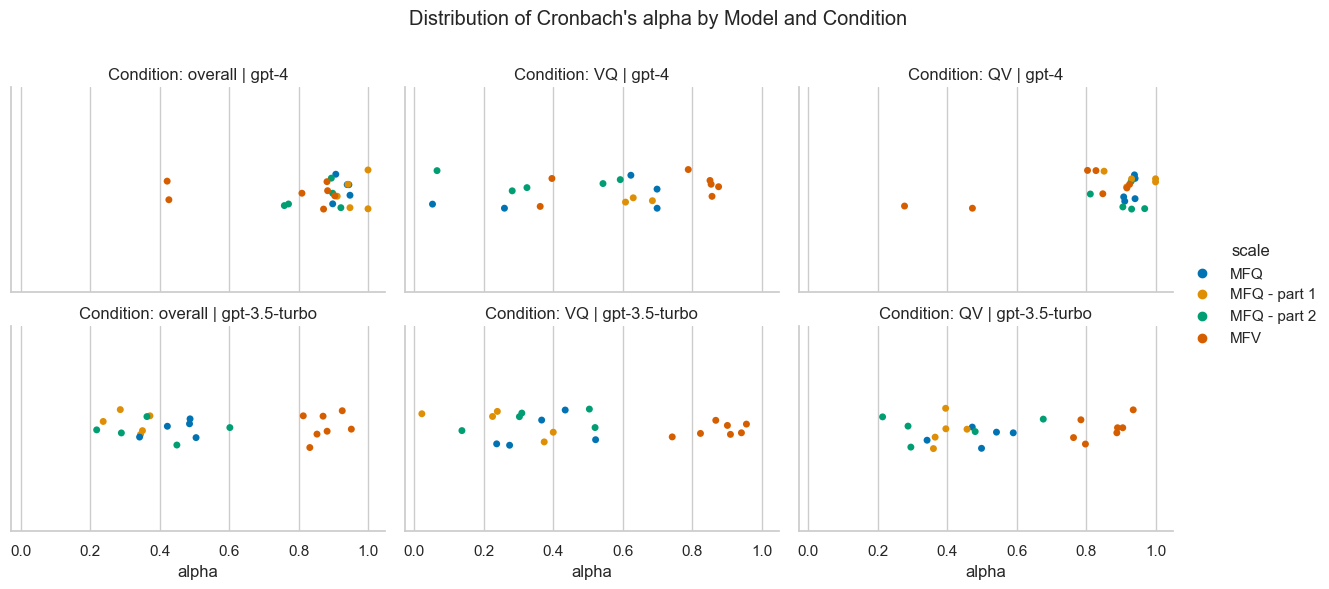

In [28]:
g = sns.catplot(
    col="condition",
    row="model",
    x="alpha",
    hue="scale",
    palette="colorblind",
    data=cronbachs.dropna(),
    height=3, aspect=1.33, margin_titles=False,
    
)

g.set_titles("Condition: {col_name} | {row_name}")
g.fig.suptitle("Distribution of Cronbach's alpha by Model and Condition")
g.fig.subplots_adjust(top=0.85)
g.fig.savefig("figs/cronbachs.png", dpi=300, bbox_inches="tight")
g.fig.savefig("figs/cronbachs.pdf", dpi=300, bbox_inches="tight")

In [29]:
cronbachs["foundation_processed"] = cronbachs.foundation.str.split(" ").str[0]
cronbachs.foundation_processed.unique()

array(['Care', 'Fairness', 'Loyalty', 'Authority', 'Sanctity', 'Liberty'],
      dtype=object)

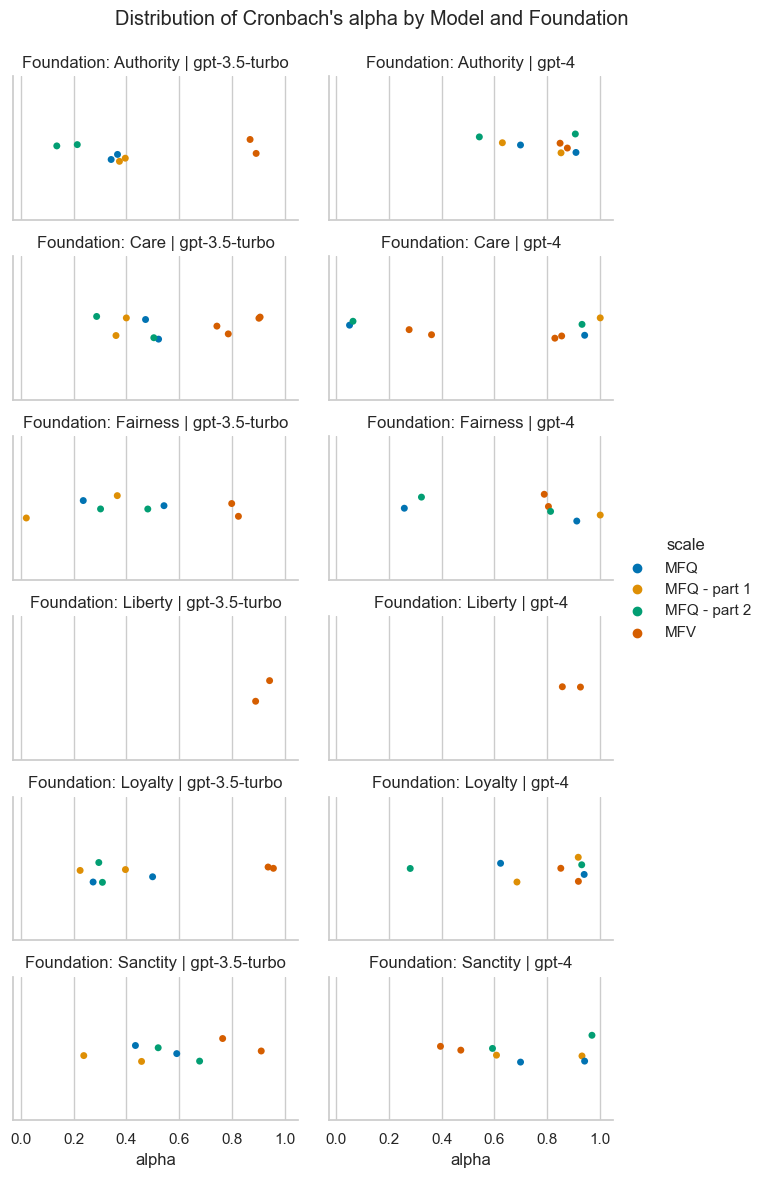

In [30]:
g = sns.catplot(
    row="foundation_processed",
    col="model",
    x="alpha",
    hue="scale",
    palette="colorblind",
    hue_order=["MFQ", "MFQ - part 1", "MFQ - part 2",  "MFV"], 
    data=cronbachs.query("condition != 'overall'").sort_values("foundation").dropna(),
    height=2, aspect=1.6, margin_titles=False,  
)

g.set_titles("Foundation: {row_name} | {col_name}")
g.fig.suptitle("Distribution of Cronbach's alpha by Model and Foundation")
g.fig.subplots_adjust(top=0.925)
g.fig.savefig("figs/cronbachs_by_foundation.png", dpi=300, bbox_inches="tight")
g.fig.savefig("figs/cronbachs_by_foundation.pdf", dpi=300, bbox_inches="tight")